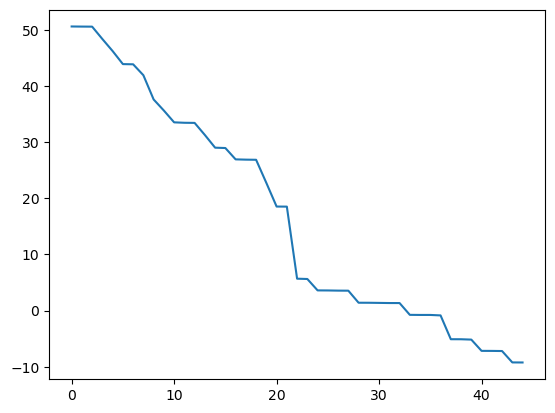

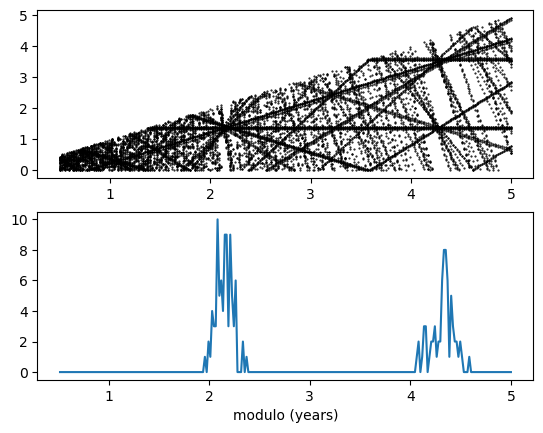

In [1]:
info = """30 July 2020
23 July 2020
19 July 2020
5 May 2018
14 March 2016
18 November 2013
5 November 2013
26 November 2011
4 August 2007
12 August 2005
8 July 2003
10 June 2003
2 June 2003
7 April 2001
3 January 1999
11 December 1998
4 December 1996
16 November 1996
7 November 1996
25 September 1992
12 July 1988
7 July 1988
9 September 1975
20 August 1975
9 August 1973
5 August 1973
25 July 1973
21 July 1973
30 May 1971
28 May 1971
19 May 1971
10 May 1971
9 May 1971
2 April 1969
27 March 1969
27 March 1969
25 February 1969
30 November 1964
28 November 1964
5 November 1964
4 November 1962
1 November 1962
24 October 1962
14 October 1960
10 October 1960""" # https://en.wikipedia.org/wiki/List_of_missions_to_Mars

import numpy as np
import matplotlib.pyplot as plt
import calendar, datetime
# from scipy.signal import periodogram, lombscargle # no, not these


# https://stackoverflow.com/a/3418092/3904031
d = {month: index for index, month in enumerate(calendar.month_abbr) if month}

lines = info.splitlines()
dates = [line.split(' ') for line in lines]
dates = [(int(a), int(d[b[:3]]), int(c))[::-1] for a, b, c in dates]

datetimes = [datetime.datetime(*date) for date in dates]

seconds = np.array([datetime.timestamp() for datetime in datetimes])

years = seconds / (365.25 * 24 * 3600) # "Julian years"

plt.plot(years)
plt.show()

mods = np.linspace(0.5, 5, 251)
results = np.array([np.mod(years, mod) for mod in mods])

# inter-arrival times https://dsp.stackexchange.com/a/55971/25659
yearz = (years[:, None] - years).flatten()

if True:
    fig, (ax1, ax2) = plt.subplots(2, 1)
    for mod, dots in zip(mods, results):
        ax1.plot(mod * np.ones_like(dots), dots, '.k', ms=1)
    a, b = np.histogram(yearz, bins=mods)
    ax2.plot(b[1:], a)
    ax2.set_xlabel('modulo (years)')
    plt.show()